![alt text](images/uspas.png)
# Fundamentals of Accelerator Physics and Technology 
### (with Simulations and Measurements Lab)
# Measuring Beam Distributions at the SNS BTF
##### Author: K. Ruisard and A. Zhukov

## We will be measuring the beam distribution at the SNS Beam Test Facility (BTF), using Zoom and screen-sharing to enable remote control over the experiment. Additionally, as part of the lab report, simulations of the BTF will be performed in OPAL using the [Sirepo](https://beta.sirepo.com) environment. Questions to be turned in for credit are in **bold** and numbered.

### Python Notes: 
- You wont need much python specific code for this lab, but here are some tips:
- Press shift+enter to execute a cell, or use the play button at the top of the window
- Make sure you exectue cells in order, or re-exectue cells if you change something at the top of the notebook.
- You can also execute the whole notebook by using 'Run all cells' under the 'Run' tab.



Also helpful: Shift+right click brings up OS/browser right-click menu, where you can copy image or save.

----------

In [1]:
%matplotlib inline

## 1. Introduction to SNS Beam Test Facility

The Beam Test Facility (BTF) is a replica of the SNS injector. It is comprised of:

- $H^-$ ion source,
- very short low-energy beam transport (LEBT) section which focuses 65 keV, 40-60 mA beam produced by the ion source, 
- a radiofrequency quadrupole (RFQ), which accelerates from 65 keV to 2.5 MeV while simultaneously focusing the beam,
- medium energy beam transport (MEBT) at 2.5 MeV


In the SNS, the MEBT section provides room for focusing and diagnostics before entrance into the accelerating sections of the linac. 
At the BTF, only the first accelerating stage is present (the RFQ). The MEBT includes diagnostics that sample the beam distribution and a section with periodic FODO focusing that supports beam transport studies. The 2.5 MeV medium-energy range is of interest due to the space charge effects on particle motion. 

After the RFQ, a series of four quadrupoles are used to contain and control the transverse beam size. Each quadrupole focuses in one plane and defocuses in the other. Near the end of a linac, quadrupoles will be optimized for desired beam size on target or for matched injection into a ring. Along the linac, quadrupoles are set to maintain a well-focused beam and minimize losses during acceleration stages.  

Take a quick walkthrough tour of the BTF here:
> https://youtu.be/c3719f9jUSA


This plot shows evolution of beam rms sizes between the RFQ exit and the first set of slits.
The location of the four quadrupoles is indicated in the drawing. Quadrupole polarity is indicated by the shape.
At the slit, the predicted beam sizes are x-rms = 3.25 mm, y-rms = 4.10 mm


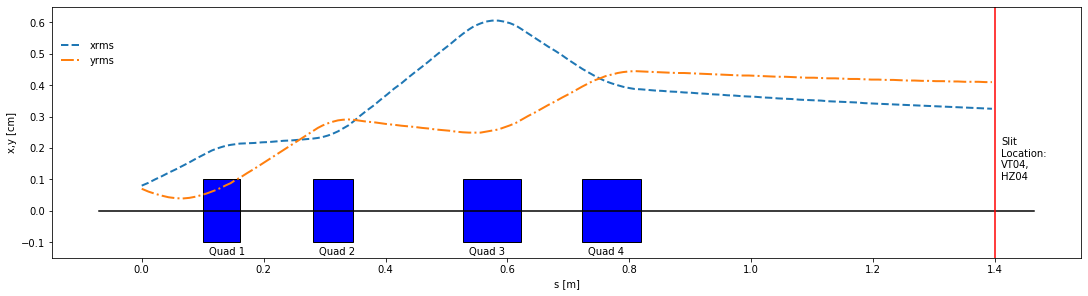

In [2]:
## Ignore this code box; This produces the plot of beam size vs s

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

print('This plot shows evolution of beam rms sizes between the RFQ exit and the first set of slits.')

filename = 'data/data_beam_evolution_32mA_pyorbit'
names = ['s','n','xrms','yrms','zrms','ax','bx','ex','ay','by','ey','az','bz','ez','sx','sy','sxx','syy','sxy','r90','r99']
df = pd.read_csv(filename,sep='\s+',names=names,skiprows=1)


fig,ax1 = plt.subplots(constrained_layout=True,figsize=[15,4])
ax1.plot(df['s'],df['xrms'],label='xrms',linestyle='--',linewidth=2)
ax1.plot(df['s'],df['yrms'],label='yrms',linestyle='-.',linewidth=2)
ax1.set_xlabel('s [m]')
ax1.set_ylabel('x,y [cm]')
plt.legend(loc='upper left',bbox_to_anchor=(0,1),frameon=False)
ax1.set_ylim([-.15,.65])

plt.legend(loc='upper left',bbox_to_anchor=(0,.9),frameon=False);


# -- draw lattice
from matplotlib.patches import Polygon

print('The location of the four quadrupoles is indicated in the drawing. Quadrupole polarity is indicated by the shape.')

maglist = []
maglist.append([.1306, .061, 0,  'Quad 1'])
maglist.append([.3139, .066, 0, 'Quad 2'])
maglist.append([.5751, .096, 0,  'Quad 3'])
maglist.append([.7709, .096, 0, 'Quad 4'])

def magparse(magval):
    s0 = magval[0] -.5*magval[1]
    s1 = magval[0] + .5*magval[1]
    i = magval[2]
    name = magval[3]
    return (s0,s1,i,name)

def drawmag(magval,h):
    
    if not(type(h)==list):
        h = [-h,h]
    
    s0,s1,i,name = magparse(magval)
    c = magval[0]
    m = 0.5*(h[0]+h[1])
    
    if i==1: #Positive quad
        pts = np.array([[s0,m],[c,h[1]],[s1,m],[c,h[0]]])
    elif i==-1: # negative quad
        pts = np.array([[c,m],[s0,h[1]],[s1,h[1]],[c,m],[s1,h[0]],[s0,h[0]]])
    elif i==0: # unspecified polarity
        pts = np.array([[s0,h[0]],[s1,h[0]],[s1,h[1]],[s0,h[1]]])
        
    plt.text(s0+.01,h[0]-.04,name,color='k')


    
    p = Polygon(pts, fc='blue',ec="black")
    ax = plt.gca()
    ax.add_patch(p)

h=[-.1,.1]; 
plt.sca(ax1)
plt.plot(plt.xlim(),[0.5*(h[0]+h[1]),0.5*(h[0]+h[1])],'k')
for mag in maglist:
    drawmag(mag,h)
    
plt.plot([1.4,1.4],plt.ylim(),'r')
plt.text(1.41,.1,'Slit\nLocation:\nVT04,\nHZ04');
    

print('At the slit, the predicted beam sizes are x-rms = %.2f mm, y-rms = %.2f mm'%(10*df.xrms.iloc[-1],10*df.yrms.iloc[-1]))





In the BTF each magnet is assigned a 4-character name. This name is used to refer to the process variable (PV) in the control system, which connects commands to the appropriate hardware component (aka, how you direct instructuions to the magnet power supply). 
For the convention used in the BTF, we label quads as "H" if they are horizontally focusing and "V" if they are vertically focusing. 
(Another common convention is "+" for horizontally focusing and "-" for vertically focusing.)

**Q0) Based on the simulation plot above, Record the name for the four quadrupoles shown in the above plot**

Use the naming convention:

"Q" (for quad) + polarity ("H" or "V") +  number (2 digits, starting from "01").

Quad 1: 

Quad 2: 

Quad 3:

Quad 4:

## 2. Measuring beam profile



We are going to measure a one-dimensional beam profile and compare the measured beam size to the simulation plot shown above.


We can measure the beam profile using a slit-scan technique. We insert a screen with a thin slit (0.2 mm) aperture into the path of the beam. The small fraction of beam that passes through the slit is detected on a Faraday cup. By scanning the slit position, we can measure the charge distribution of the beam in one dimension. A horizontal slit can measure vertical profile and vice versa. There is a pair of slits (one horizontal, one vertical) downstream of the first four quadrupole magnets. Their names are **VT04** (vertical) and **HZ04** (horizontal). When slits are fully retracted, their positions should read (approximately) -50 mm.

![layout of 1D slitscan measurement of beam profile](images/slitscan_1D.png)

The signal that is recorded on the Faraday cup is shown on the plot below. The beam is pulsed for a duration of 50 microseconds, which creates a rectangular signal on the Faraday cup. The Faraday cup does not have sufficient time resolution to show the bunch structure created by the RFQ (at 402.5 MHz, the RF period is 2.5 nanoseconds). To record the amount of charge collected by the Faraday cup, we average over a window of time within the pulse. We also subtract the baseline signal level, which we calculate from the Faraday cup waveform before beam arrives. The resulting quantity is proportional to the charge collected. 


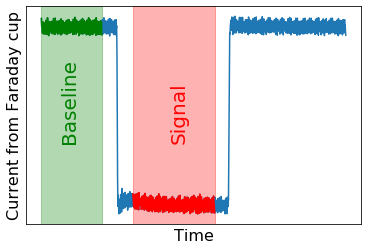

In [3]:
## Ignore this code box; This produces the plot of Faraday cup signal
fname = 'data/data_wf_FC12.txt'
df = pd.read_csv(fname,header=None,sep='\s+')

plt.plot(df); ax = plt.gca()

i0 = 300; i1 = 570
ax.axvspan(i0,i1,alpha=.3,color='red')
plt.plot(df.iloc[i0:i1],color='r')

i0 = 0; i1 = 200
ax.axvspan(i0,i1,alpha=.3,color='green')
plt.plot(df.iloc[i0:i1],color='g')

plt.text(60,-10,'Baseline',color='green',size=20,rotation='vertical')
plt.text(420,-10,'Signal',color='red',size=20,rotation='vertical')

plt.xticks([]); plt.yticks([])
plt.ylabel('Current from Faraday cup',size=16)
plt.xlabel('Time',size=16);

## Add arrow

### 2A) Insert a slit-screen into the beam path

We will insert the first vertical slit, VT04, and detect signal with the Faraday cup located halfway down the beamline, FC12. 


- Launch slit_scan GUI (ask lab instructor to do this)
- Select "VT04" from actuator drop-down list (after selection the current position of the slit will be reported)
- Select "FC12" from detector drop-down list (after selection the plot below will display the live readout from the Faraday cup)
- The slit is centered on the beam at approximately 13 mm insertion. Insert the slit to this position 
    - enter 13 mm to the righ of the "Go To" button then hit "Go to" 
    - Watch the FC12 signal and the slit progress bar as the slit moves in. 
- After you have inserted your slit, the signal level is much smaller. Adjust the plot axes
    - Right-click on the Faraday cup plot and select "View All" will automatically re-scale axes.
    - Or, right-click on plot and select "mouse mode" = "1 button" to enable a drag-and-drop zoom box

### 2B) Measure the horizontal beam profile by scanning the vertical slit across the beam. 


- Set scan to run from 0 to 26 mm at speed 1 mm/s
- hit "scan" to start 
- watch recorded data-points appear on the right-hand plot (Hint: you may need to rescale this plot as well.)

### 2C) Calculate the rms beam size from the measurement


- hit "analyze" to calculate beam moments 
- Hint: You should also save the data. This will enable you to re-load and analyze later if needed. This is a good practice, make a new folder for your group's data.
- hit "Park" to retract slit VT04

### 2D) Repeat scan for vertical profile

- Change slit to "HZ04" and repeat steps under 2B for vertical scan
- Hint: the data on the right-hand plot will clear automatically when you start a new scan.
- Park slit "HZ04"


**Q1) Record the rms sizes of the measured profiles. Compare your measured values to the values of the simulation plot above. Is the aspect ratio as expected?**

$\sigma_x$ =


$\sigma_y$ = 

## 3. Measuring beam response to quadrupole strength

The beam size is a function of the focusing strength, which is a combination of quadrupole strength and density. We can measure the effect of a single quadrupole magnet by measuring the response of the beam size to changes in quadrupole strength 

We will systematically vary quadrupole strength for two of the quadrupoles, measuring the 1D profiles using the slit-scan technique. We will compare the measured beam size to predictions generated by simulation. To facilitate this, make sure to export data after each quad scan is complete. 



### 3A) Measure the horizontal profile response to QV04 strength. 

- Launch quad_scan GUI (request lab instructor to do this)
- Select actuator "VT04"
- Select quad "QV04"
- Select detector "FC12"

**Q2) Record the initial QV04 set point:**
Hint: Once you select the quad, the set-point field will be automatically filled with the current value

QV04 strength [T/m] =


- Set the slit to scan from 0 mm to 30 mm at 1 mm/s
- Set the quad field range to scan between 80% to 140% of the nominal QV04 strength in 7 points (be careful to keep the sign correct)
- run scan
- While scan is executing, the upper left plot will show the profiles for each quadrupole setting in a different color.
- before analyzing, restore QV04 to default set point and park slit VT04

In analysis we will plot the response curve, which is the dependence of the rms size on the quad current.

- Hit "Analyze" to plot response curve (rms size versus quadrupole current)
- Save both plots (upper right and lower right axes) or screen shot GUI window.
- Save data using floppy disk icon. This will export values from both plots to a csv file. This is needed for section 3E.


### 3B) Measure the vertical profile response to QV04 strength.

Repeat the steps in 3A, but with slit HZ04. (Verify that VT04 is parked and out of the way)

- Don't forget to screenshot and save data.
- Don't forget to return QV04 is returned to default value noted above.
- Don't forget to park HZ04

**Q3) Comment on the dependence of the X and Y profiles on the quadrupole strength. Is the behavior as expected? (Refer to simulation plot above if needed).**


### 3C) Measure the beam response to QH03 in both the horizontal and vertical planes
Repeat the steps in 3A and 3B with QH03 instead of QV04. This time scan the quadrupole in the range 90% to 130% of default value. 

Important: reduce the scan speed for the QH03+VT04 scan *only* to 0.5 mm/s.



**Q4) Record the default QH03 setpoint:**



QH03 strength [T/m] = 

After each scan: 
- Don't forget to screenshot and save data.
- Don't forget to park HZ04

After both scans are complete, don't forget to return QH03 to default value noted above.



<br/>

**Q5) Attach the four screenshots (one from each scan)**

QV04 vs VT04

QV04 vs HZ04 

QH03 vs VT04 

QH03 vs HZ04

### 3D) make your own version of the response curve plot

This section can be completed offline after measurements are complete. Just make sure you have saved csv data from the four quadrupole scans above.

You will end up with data from four response curves:
- $\sigma_x$ vs QV04 current, 
- $\sigma_y$ vs QV04 current, 
- $\sigma_x$ vs QH03 current, 
- $\sigma_y$ vs QH03 current, 

In preparation to compare with simulation, make your own plot of the measured response. 
Your instructor will send you your saved data. The last section of the data will include the 7 response curve points in the format:

- quad field, rms size

Hint: You can use whichever plotting program you choose or save screenshots of plots from measurement lab. A section of python code that will produce the plots is provided at the end of this worksheet.

### 3E) Compare your response measurements to simulation

This section can be completed offline after the measurement portion is completed. 

We often seek to benchmark are simulations by comparing to measurements. In this way, we can verify that the simulation is representative of the behavior of the accelerator and trust its predictions, or we can identify unusual behavior in the accelerator. 
We will run a simulation of the BTF MEBT on the sirepo server to generate values to compare to our measurements. 


We will use the simulation code OPAL. OPAL is a particle-in-cell code that solves for the 3D internal fields of the bunch and tracks particles through these fields as well as the fields of external elements (e.g., magnets). The 3D solver is necessary to account for space charge, which acts as an additional defocusing force due to Coulomb repulsion of the particles within the bunch.  The initial bunch for these simulations is generated by simulating the transport through the RFQ. 

Open simulation sns-btf-mebt.
> https://www.sirepo.com/opal#/lattice/HdMZdgoF

You will be prompted to open a copy of the simulation in your own Sirepo workspace. If this is your first time logging into Sirepo on your computer, you will first be asked to verify through email. After you've saved a copy, you can view all simulations in your workspace at https://www.sirepo.com/opal.

Under the Lattice tab:
- Find "QV04" in Beamline Elements list; hover mouse over the element and then click "Edit."
- Adjust 'K1' field to be 80% of default value
- Hint: Sirepo will do math for you. Add "*0.8" to the end of the value in the box instead of calculating 80% strength yourself. 

Under the Visualization tab:
- Select "Start New Simulation."
- After simulation completes, plots will automatically be generated. 
- Find the "Beam Statistics" plot. Record the x-rms and y-rms values at the slit location 
- hint: Hover your mouse over a point to see the coordinates
- hint: The simulation is set to end at the slit plane. 

Perform the above for at least 5 points for QH03 and 5 points for QV04. Add the simulated rms values to your plot above.



**Q6) Attach plots for the four response curves with both measured and simulated values.**



Use plotting program of choice or plotting routine at the end of this worksheet.

**Q7) You should see that the agreement between simulation and measurement becomes worse for larger changes to quadrupole strength. 
Propose an explanation for why this is.**

- hint: the pipe aperture in simulation is much larger than used in measurement. Additionally, the true beam centro is not as well-centered as the simulated trajectory. 
<br/>


## 4. Measuring the phase space distribution



Above we used one-dimensional profiles to verify the behavior of our accelerator and benchmark our simulations. 
Occasionally we would like to predict downstream evolution of a measured beam distribution (actually that is the main focus of research being done at the BTF!)
There is not enough information in the x and y profiles to accomplish this; we also need information about the velocity distribution.

To obtain enough information for particle tracking, we can measure the beam distribution in phase space using the same slit-scan technique. This time, we will insert two slits. The first isolates charge in position space; the second isolates in momentum space. 

![layout of 2D slitscan measurement of beam phase space](images/slitscan_2D.png)



### 4A) Perform the emittance scan

We will use slits VT04 and VT06 to measure the horizontal phase space of the beam. The signal to noise ratio of this measurement is lower than the previous measurements, since we are inserting two slits instead of one. Accelerators are noisy environments, so this smaller signal is hard to detect. To compensate we will use an amplifier. This amplifier is located inside the BTF enclosure at the location of the Faraday cup, so that signal is amplified prior to transmission to the digitizer. 


First let's select two slits and set up our detector:
- launch "emittance_scan" GUI (ask lab instructor)
- select VT04 and VT06 slits
- Select "FC12" detector
- Insert VT04 to 13 mm, VT06 to 13 mm
- After slits have reached destination, turn Faraday cup amplifier on (use toggle button)

Now we will set up the scan parameters
- set ranges and stepsize:
    - VT04 = $[4,24]$, 20 steps
    - VT06 = $[0,25]$, speed 1 mm/s
- run scan
- immediately after scan is complete, use floppy-disk icon to save data. 

Both scan axes (upper right and lower right) will update as scan progresses. The upper right plot shows the profile measured as VT06 sweeps across its range. Separate profiles will be plotted for each step in VT04. 

This scan takes about 10 minutes. While the scan is running you can consider the transformation of slit coordinates to phase space coordinates (see Q8 and Q9 below).









### 4B) Transform the data into the phase space coordinates

You can change how the plot is drawn with the "Phase" and "Raw" buttons:
- "Phase" will plot the distribution in the phase space coordinates
- "Raw" will plot in the slit position coordinates (the initial plot is drawn in these axes).

Hint: You can zoom in the plot interactively by right-clicking on plot and selecting "mouse mode."

The output of the scan is the charge collected as a function of position of the VT04 and VT06 slits. We need to apply a transformation to convert slit positions to phase space variables $x$ and $x' = dx/ds$. 
You can take a screenshot or save the plot. Note the threshold setting you have used. 


**Q8) Derive the transformation from slit positions $x_{VT04}$ and $x_{VT06}$ to position $x$ and momentum angle $x'$ at the VT04 plane.** 

This question can be completed offline after measurement portion is done. 

- hint: the units of x' should be in radians
- hint: the distance between the two slits is always much larger than the transverse offsets between slits
- hint: $x_{VT04}$ is the inserted position of the first slit and $x_{VT06}$ is the inserted position of the second slit.

**Q9) Given your expression derived in Q8, derive the uncertainty in momentum coordinate $x'$. Both slits have width 0.2 mm, meaning the uncertainty in x is $\delta x = \pm 0.1$ mm. This is much larger than the uncertainty in actuator position, which is $\sim 0.02$ mm. The longitudinal distance between the two slits is $0.947 \pm 0.001$ meters. Give your answer in units of milliradians.**

This question can be completed offline after measurement portion is done. 

- hint: assume random and independent errors, for which the following formula applies: $\left(\delta f(x,y,z)\right) ^2 = \left(\frac{\partial f}{\partial x} \delta x \right)^2 + \left(\frac{\partial f}{\partial x} \delta y \right)^2 + \left(\frac{\partial f}{\partial z} \delta z \right)^2$.

### 4C) Calculate emittance with threshold

Now we will calculate rms emittance from our measurement. The formula for calculating emittance from the measurement is as follows: 

- Rms emittance $\epsilon_x$ is defined as $\epsilon_x = \sqrt{\left< x^2 \right>\left<x'^2 \right> - \left< x x'\right>^2}$.

- Our measurement samples from the charge density function $f(x,x')$ at a series of discrete points $\left(x_i,x'_i\right)$.

- Definitions:
    + $\left< x^2 \right> = \frac{\sum_i x_i^2  f(x_i,x'_i)}{ \sum_i f(x_i,x'_i)}$ 
    <br/>
    
    + $\left< x'^2 \right> = \frac{\sum_i  x'^2_i f(x_i,x'_i)}{ \sum_i f(x_i,x'_i)}$ 
    <br/>
    
    + $\left< x x' \right> = \frac{\sum_i x_i x'_i f(x_i,x'_i)}{ \sum_i f(x_i,x'_i)}$ 
    <br/>
    

The GUI does this calculation for you. However, rms parameters are affected by noise. Therefore it is important to set a **threshold** above the noise level. 

In this analysis, threshold is defined as percent of the peak intensity. 
Also, emittance units are in mm-mrad and are normalized. 
This analysis also reports the Twiss parameters $\alpha$ and $\beta$ for the measured distribution.


The plot below illustrated a 5% threshold applied to a 1D profile measurement in order to exclude the 2% rms noise.



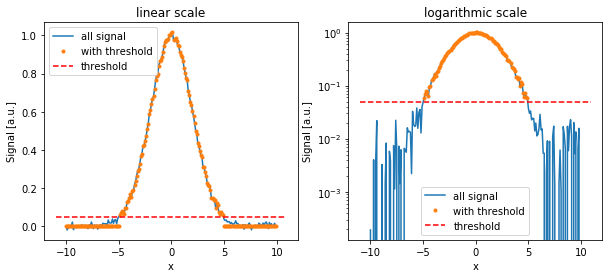

In [4]:
## Ignore this cell, just generating and plotting fake data
x = np.arange(-10,10,.1)
sigmax = 2
gaus = lambda x: np.exp(-x**2/(2*sigmax**2))

noise_level = 0.01
noise = np.random.normal(0,noise_level,len(x))

signal = gaus(x) + noise

threshold = 0.05
thr_signal = signal.copy()
thr_signal[thr_signal < threshold] = 0

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(x,signal,label='all signal'); plt.plot(x,thr_signal,'.',label='with threshold')
plt.plot(plt.xlim(),[threshold,threshold],'r--',label='threshold')
plt.ylabel('Signal [a.u.]'); plt.xlabel('x'); plt.title("linear scale")
plt.legend()
plt.subplot(122)
plt.semilogy(x,signal, label='all signal'); plt.plot(x,thr_signal,'.',label='with threshold')
plt.plot(plt.xlim(),[threshold,threshold],'r--',label="threshold")
plt.ylabel('Signal [a.u.]'); plt.xlabel('x'); plt.title("logarithmic scale")
plt.legend();

In the GUI, type in a threshold and hit "Analyze" to calculate the rms emittance. 
Try different threshold numbers and note the effect on the reported emittance. 
You should see that as the threshold is increased the emittance shrinks: first because you are removing noise, but if you go too high you will be throwing away signal!

**Q9) Record the threshold value which removes the noise but includes as much signal as possible.**

Hint: The slider bar on the right of the intensity plot will mask the brighest portions of the beam. If you lower the slider you will see the background noise. Choose a threshold that removes this background.

threshold [%] = 

**Q10) Record the calculated emittance for the above threshold value (include at least two significant digits). For RFQ-captured hadron beams we typically expect 0.3 mm mrad emittances. Is your answer close to expectations?**

emittance [mm-mrad] = 

**Q11) Submit a copy of the plot in the x,x' phase space coordinates with your lab report**

Make a screenshot and include threshold/emittance analysis tab. 

**Q12) Based on your measurement, is the beam converging or diverging in the horizontal plane?** 


### 4D) Restore all settings to their original state

- turn off the FC12 amplifier
- retract both slits
- verify that both quadrupoles you used are set to the default set-points that you noted above.



## Optional plotting routine

This plotting routine is provided for the response data calculated in sections 3D and 3E. Feel free to use this or any other plotting routine.


To use the python routine, enter your data in the cell below in a list format, for example [1,2,3,4]

Execute both cells below to produce the plot.

In [5]:
###########################################
## Measurement
###########################################

# -- default current values
iQH03 = 1.
iQV04 = 1.

# -- current range for measurement of QH03 in T/m
imeas3 = []
# -- measured beam profile widths for QH03 in mm
xfwhm3 = []
yfwhm3 = []

# -- current range for measurement of QH04 in T/m
imeas4 = []
# -- measured beam profile widths for QH04 in mm
xfwhm4 = []
yfwhm4 = []

###########################################
## Simulation
###########################################

# -- simulated strength of QH03 as fractional 
# values (1 = QH03 default strength)
isim3 = []
# -- simulated rms widths for QH03 in mm
xrms3 = []
yrms3 = []

# -- simulated strength of QH04 as fractional 
# values (1 = QH04 default strength)
isim4 = []
# -- simulated rms widths for QH04 in mm
xrms4 = []
yrms4 = []


In [6]:
# -- normalize by default current
im3 = np.array(imeas3)/iQH03
im4 = np.array(imeas4)/iQV04

if imeas3 or isim3:
    plt.figure()
    # measured
    if xfwhm3:
        plt.plot(im3, xfwhm3, 'C0', linestyle='none',marker='o', label='meas-x')
    if yfwhm3:
        plt.plot(im3, yfwhm3, 'C1', linestyle='none',marker='s', label='meas-y')
    # simulated
    if xrms3:
        plt.plot(isim3, xrms3, '.-C0', label='model-x')
    if yrms3:
        plt.plot(isim3, yrms3, '.-C1',  label='model-y')
    plt.legend()
    plt.title('QH03 reponse curves')
    plt.xlabel('QH03 strength [arb. units]')
    plt.ylabel('beam size [mm]')


if imeas4 or isim4:
    plt.figure()
    # measured
    if xfwhm4:
        plt.plot(im4, xfwhm4, 'C0', linestyle='none',marker='o', label='meas-x')
    if yfwhm4:
        plt.plot(im4, yfwhm4, 'C1',linestyle='none',marker='s',label='meas-y')
    # simulated
    if xrms4: 
        plt.plot(isim4, xrms4, '.-C0', label='model-x')
    if yrms4:
        plt.plot(isim4, yrms4, '.-C1', label='model-y')
    plt.legend()
    plt.title('QV04 reponse curves')
    plt.xlabel('QV04 strength [arb. units]')
    plt.ylabel('beam size [mm]')